<a href="https://colab.research.google.com/github/DigvijaysingPatil/Determining-Status-for-Loan-Applicants/blob/main/Determining_the_status_for_loan_apllications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import imblearn

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_excel('/content/drive/MyDrive/data /LoanData.xlsx')

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.shape

(614, 13)

In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
###### Descriptive Statistics ########

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
df.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002936,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [12]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [13]:
######## Data Cleaning #########

In [14]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
df ['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df ['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df ['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df ['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [16]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History']).median()

In [17]:
df.isnull().sum().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


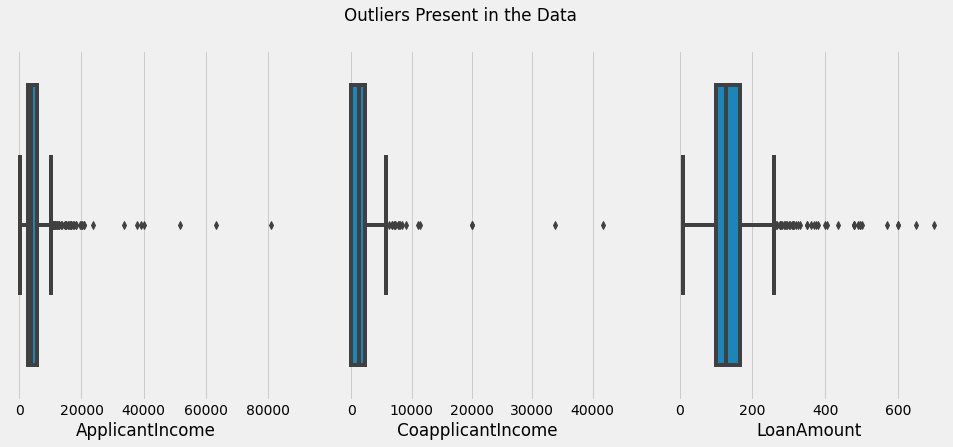

In [18]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']= (15,6)

plt.subplot(1,3,1)
sns.boxplot(df['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(df['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(df['LoanAmount'])

plt.suptitle('Outliers Present in the Data')
plt.show()

Before Removing Outliers  (614, 13)
After Removing Outliers  (530, 13)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


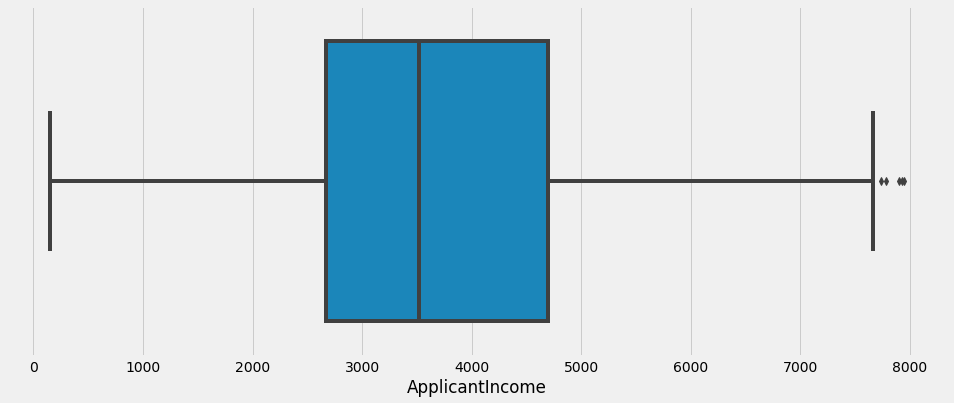

In [19]:
print("Before Removing Outliers ", df.shape)
df = df[df['ApplicantIncome'] < 8000]
sns.boxplot(df['ApplicantIncome'])
print("After Removing Outliers ", df.shape)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(515, 13)

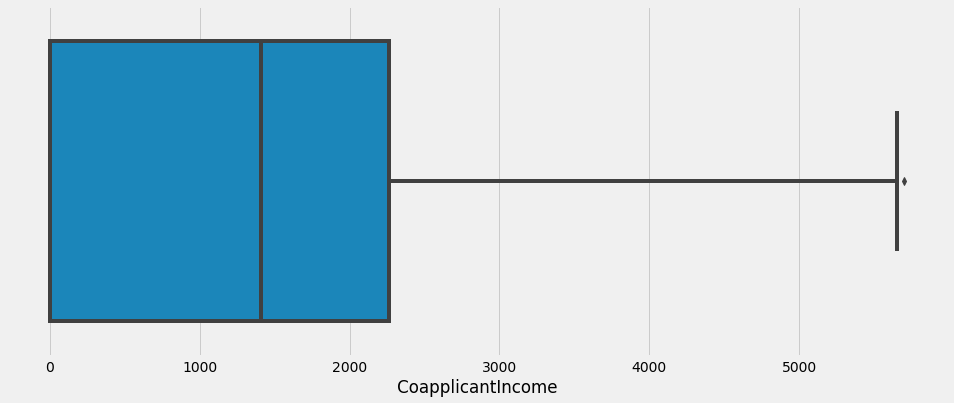

In [20]:
df = df[df['CoapplicantIncome']<6000]
sns.boxplot(df['CoapplicantIncome'])
df.shape

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(497, 13)

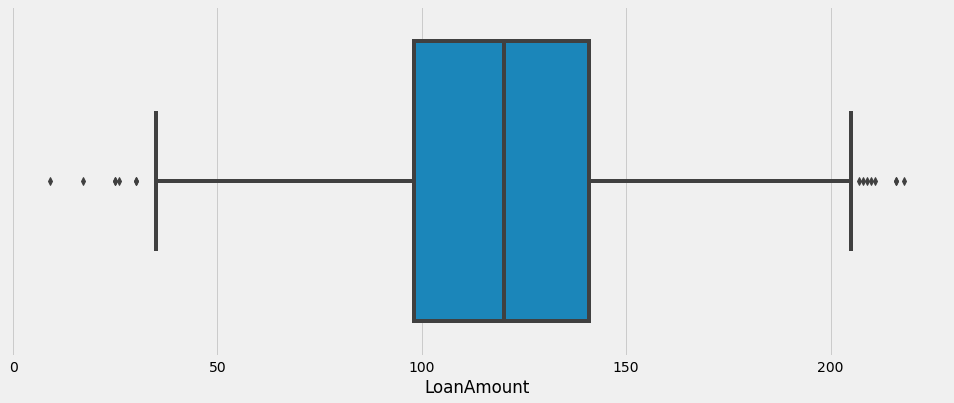

In [21]:
df = df[df['LoanAmount']<230]
sns.boxplot(df['LoanAmount'])
df.shape

In [22]:
####### Univariate Analysis #######

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

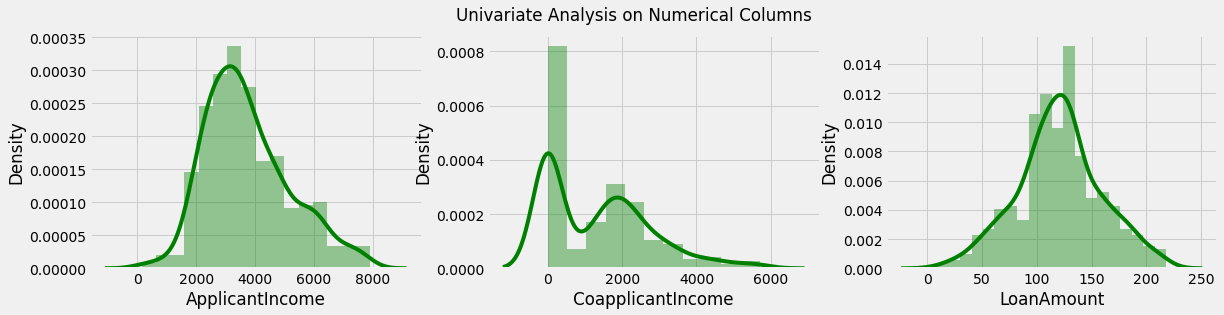

In [23]:
plt.rcParams['figure.figsize'] = (18, 4)
plt.subplot(1,3, 1)
sns.distplot(df['ApplicantIncome'], color = 'green')

plt.subplot(1,3, 2)
sns.distplot(df['CoapplicantIncome'], color = 'green')

plt.subplot(1,3, 3)
sns.distplot(df['LoanAmount'], color = 'green')

plt.suptitle('Univariate Analysis on Numerical Columns')
plt.show()

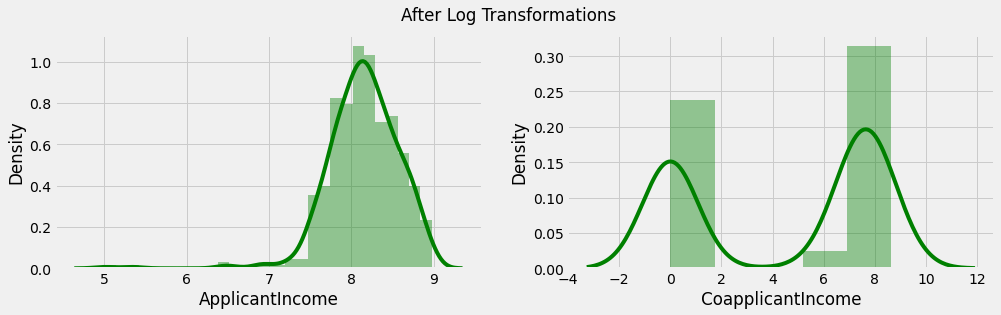

In [24]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,4)

df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.log1p(df['CoapplicantIncome'])

plt.subplot(1, 2, 1)
sns.distplot(df['ApplicantIncome'], color = 'green')

plt.subplot(1, 2, 2)
sns.distplot(df['CoapplicantIncome'], color = 'green')

plt.suptitle('After Log Transformations')
plt.show()

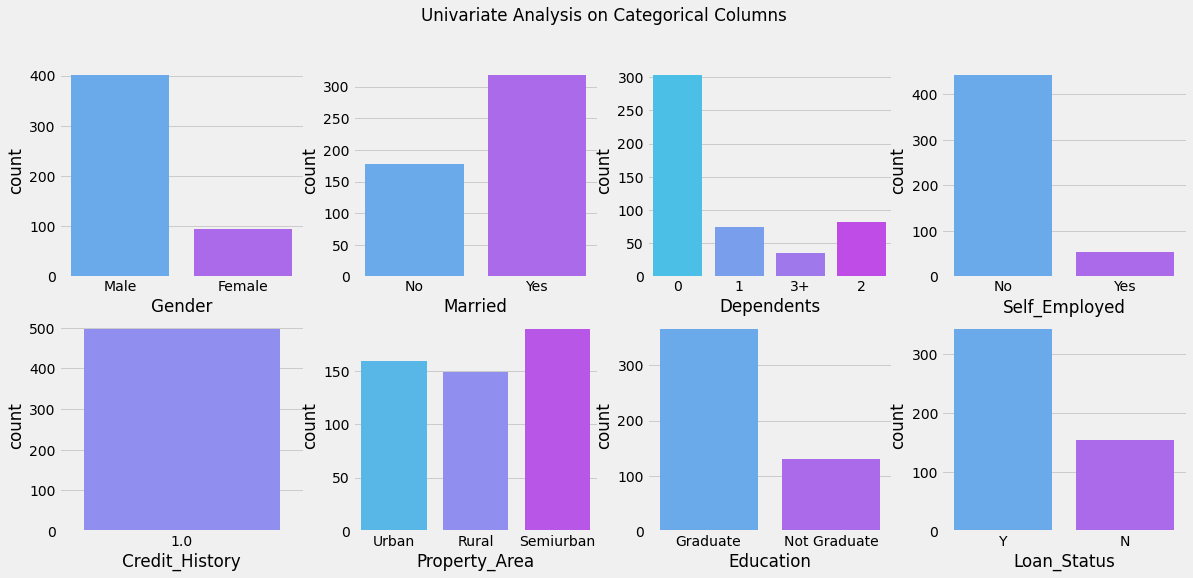

In [25]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(2, 4, 1)
sns.countplot(df['Gender'], palette = 'cool')

plt.subplot(2, 4, 2)
sns.countplot(df['Married'], palette = 'cool')

plt.subplot(2, 4, 3)
sns.countplot(df['Dependents'], palette = 'cool')

plt.subplot(2, 4, 4)
sns.countplot(df['Self_Employed'], palette = 'cool')

plt.subplot(2, 4, 5)
sns.countplot(df['Credit_History'], palette = 'cool')

plt.subplot(2, 4, 6)
sns.countplot(df['Property_Area'], palette = 'cool')

plt.subplot(2, 4, 7)
sns.countplot(df['Education'], palette = 'cool')

plt.subplot(2, 4, 8)
sns.countplot(df['Loan_Status'], palette = 'cool')

plt.suptitle('Univariate Analysis on Categorical Columns')
plt.show()

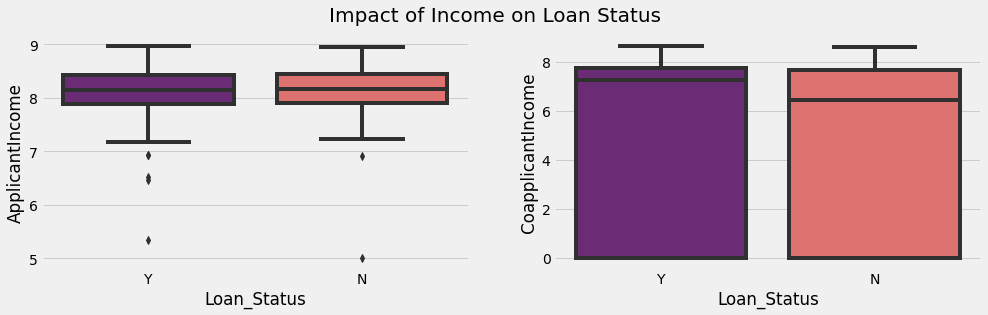

In [26]:
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 2, 1)
sns.boxplot(df['Loan_Status'], df['ApplicantIncome'], palette = 'magma')

plt.subplot(1, 2, 2)
sns.boxplot(df['Loan_Status'], df['CoapplicantIncome'], palette = 'magma')

plt.suptitle('Impact of Income on Loan Status\n', fontsize = 20)
plt.show()

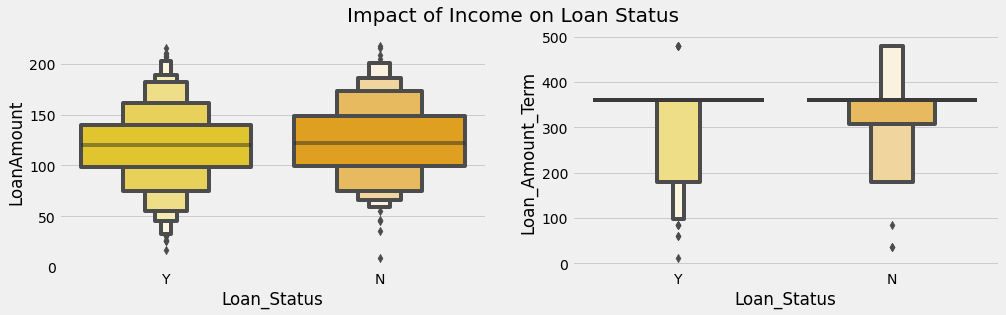

In [27]:
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 2, 1)
sns.boxenplot(df['Loan_Status'], df['LoanAmount'], palette = 'Wistia')

plt.subplot(1, 2, 2)
sns.boxenplot(df['Loan_Status'], df['Loan_Amount_Term'], palette = 'Wistia')

plt.suptitle('Impact of Income on Loan Status\n', fontsize = 20)
plt.show()

In [28]:
print("Impact of Marraige on Loan Status")
print(pd.crosstab(df['Loan_Status'], df['Married']))
print('\n')

print("Impact of Dependents on Loan Status")
print(pd.crosstab(df['Loan_Status'], df['Dependents']))
print('\n')

print("Impact of Education on Loan Status")
print(pd.crosstab(df['Loan_Status'], df['Education']))
print('\n')

print("Impact of Employment on Loan Status")
print(pd.crosstab(df['Loan_Status'], df['Self_Employed']))
print('\n')

print("Impact of Property on Loan Status")
print(pd.crosstab(df['Loan_Status'], df['Property_Area']))

Impact of Marraige on Loan Status
Married       No  Yes
Loan_Status          
N             64   90
Y            114  229


Impact of Dependents on Loan Status
Dependents     0   1   2  3+
Loan_Status                 
N             92  26  23  13
Y            212  49  59  23


Impact of Education on Loan Status
Education    Graduate  Not Graduate
Loan_Status                        
N                 102            52
Y                 264            79


Impact of Employment on Loan Status
Self_Employed   No  Yes
Loan_Status            
N              136   18
Y              307   36


Impact of Property on Loan Status
Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 58         41     55
Y                 91        148    104


In [29]:
df.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [31]:
print("Before Deleting Columns :", df.shape)

df = df.drop(['Loan_ID'], axis = 1)

print("After Deleting Columns :", df.shape)

Before Deleting Columns : (497, 13)
After Deleting Columns : (497, 12)


In [33]:
df['Gender'] = df['Gender'].replace(('Male','Female'),(1, 0))
df['Married'] = df['Married'].replace(('Yes','No'),(1, 0))
df['Education'] = df['Education'].replace(('Graduate','Not Graduate'), (1, 0))
df['Self_Employed'] = df['Self_Employed'].replace(('Yes','No'), (1, 0))
df['Loan_Status'] = df['Loan_Status'].replace(('Y','N'), (1, 0))

In [34]:
df['Property_Area'] = df['Property_Area'].replace(('Urban','Semiurban', 'Rural'),(1, 1, 0))

In [35]:
df['Dependents'] = df['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 1, 1))

In [36]:
df.select_dtypes('object').columns

Index([], dtype='object')

In [38]:
y = df['Loan_Status']
x = df.drop(['Loan_Status'], axis = 1)

print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (497, 11)
Shape of y : (497,)


In [39]:
from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_sample(x, y.values.ravel())

print(x_resample.shape)
print(y_resample.shape)

(686, 11)
(686,)


In [40]:
print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling :
1    343
0    154
Name: Loan_Status, dtype: int64
After Resampling :
1    343
0    343
Name: 0, dtype: int64


In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Test :", x_test.shape)
print("Shape of the y Test :", y_test.shape)

Shape of the x Train : (548, 11)
Shape of the y Train : (548, 1)
Shape of the x Test : (138, 11)
Shape of the y Test : (138, 1)


In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.6204379562043796
Testing Accuracy : 0.6159420289855072


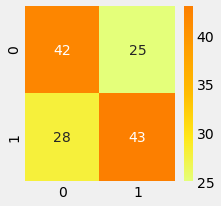

              precision    recall  f1-score   support

           0       0.60      0.63      0.61        67
           1       0.63      0.61      0.62        71

    accuracy                           0.62       138
   macro avg       0.62      0.62      0.62       138
weighted avg       0.62      0.62      0.62       138



In [43]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred)
print(cr)

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

model =  GradientBoostingClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9251824817518248
Testing Accuracy : 0.6811594202898551


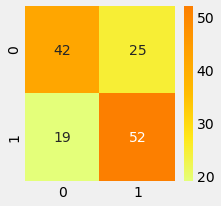

              precision    recall  f1-score   support

           0       0.69      0.63      0.66        67
           1       0.68      0.73      0.70        71

    accuracy                           0.68       138
   macro avg       0.68      0.68      0.68       138
weighted avg       0.68      0.68      0.68       138



In [45]:
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred)
print(cr)

In [47]:
from sklearn.model_selection import cross_val_score

clf = GradientBoostingClassifier(random_state = 0)
scores = cross_val_score(clf, x_train, y_train, cv=10)
print(scores)

[0.8        0.8        0.70909091 0.58181818 0.69090909 0.70909091
 0.65454545 0.65454545 0.74074074 0.7962963 ]


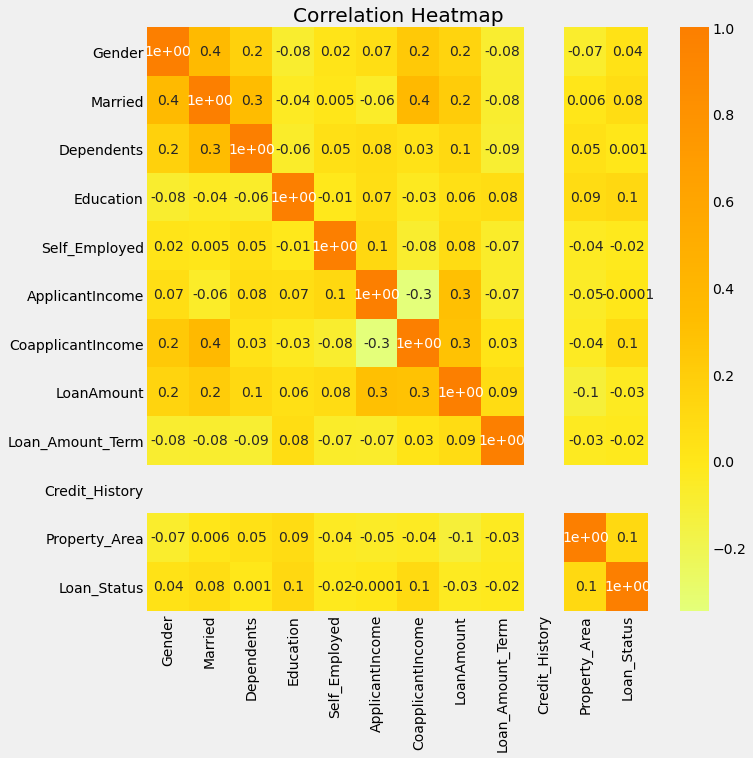

In [50]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fivethirtyeight')

sns.heatmap(df.corr(), 
            annot = True, 
            fmt = '0.01',
            cmap = 'Wistia')
plt.title('Correlation Heatmap')
plt.show()

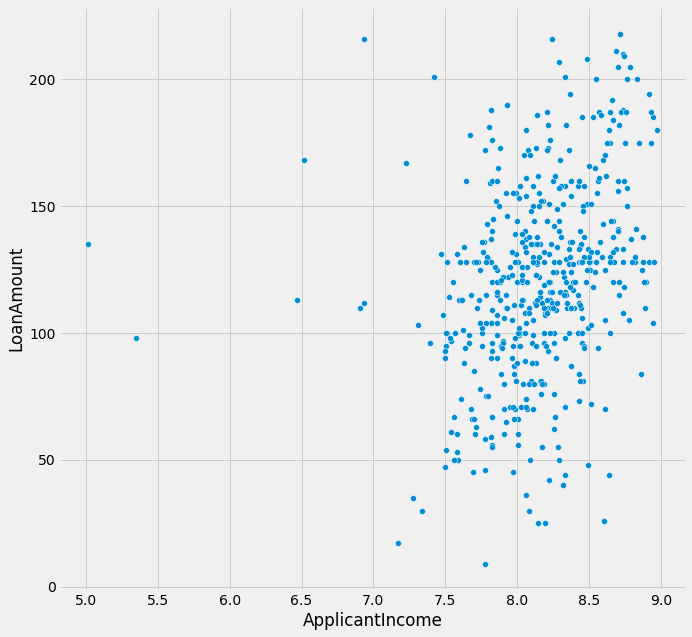

In [52]:
sns.scatterplot(df['ApplicantIncome'], df['LoanAmount'])
plt.show()

In [53]:
df[df['ApplicantIncome'] < df['CoapplicantIncome']][['ApplicantIncome',
                                'CoapplicantIncome']].sort_values(by = 'CoapplicantIncome', ascending = False)

,ApplicantIncome,CoapplicantIncome
242,7.994632,8.648572
502,8.489822,8.634976
530,6.932448,8.612685
503,8.306472,8.576028
188,6.513230,8.574896
440,8.205218,8.530109
181,7.557995,8.529912
76,8.229511,8.466110
337,7.824046,8.434029
145,7.753624,8.408940
